In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [5]:
df=pd.read_csv('Vehicle_price_Data.csv')

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1002 entries, 0 to 1001
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   name            1002 non-null   object 
 1   description     946 non-null    object 
 2   make            1002 non-null   object 
 3   model           1002 non-null   object 
 4   year            1002 non-null   int64  
 5   price           979 non-null    float64
 6   engine          1000 non-null   object 
 7   cylinders       897 non-null    float64
 8   fuel            995 non-null    object 
 9   mileage         968 non-null    float64
 10  transmission    1000 non-null   object 
 11  trim            1001 non-null   object 
 12  body            999 non-null    object 
 13  doors           995 non-null    float64
 14  exterior_color  997 non-null    object 
 15  interior_color  964 non-null    object 
 16  drivetrain      1002 non-null   object 
dtypes: float64(4), int64(1), object(1

In [7]:
df.isnull().sum()

name                0
description        56
make                0
model               0
year                0
price              23
engine              2
cylinders         105
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     38
drivetrain          0
dtype: int64

In [8]:
df.drop('description',inplace=True,axis=1)

In [9]:
df.drop('name',inplace=True,axis=1)

In [10]:
#df.model.unique()

In [11]:
df.head(2)

,make,model,year,price,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
0,Jeep,Wagoneer,2024,74600.0,24V GDI DOHC Twin Turbo,6.0,Gasoline,10.0,8-Speed Automatic,Series II,SUV,4.0,White,Global Black,Four-wheel Drive
1,Jeep,Grand Cherokee,2024,50170.0,OHV,6.0,Gasoline,1.0,8-Speed Automatic,Laredo,SUV,4.0,Metallic,Global Black,Four-wheel Drive


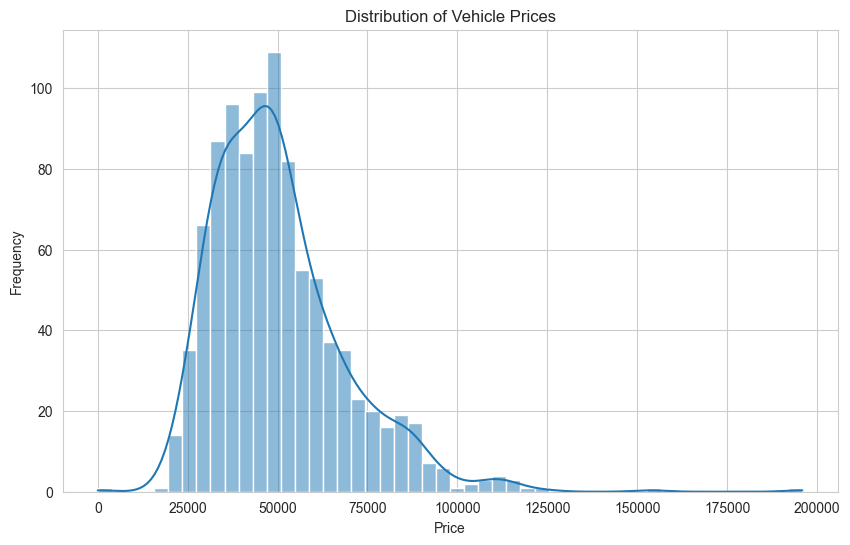

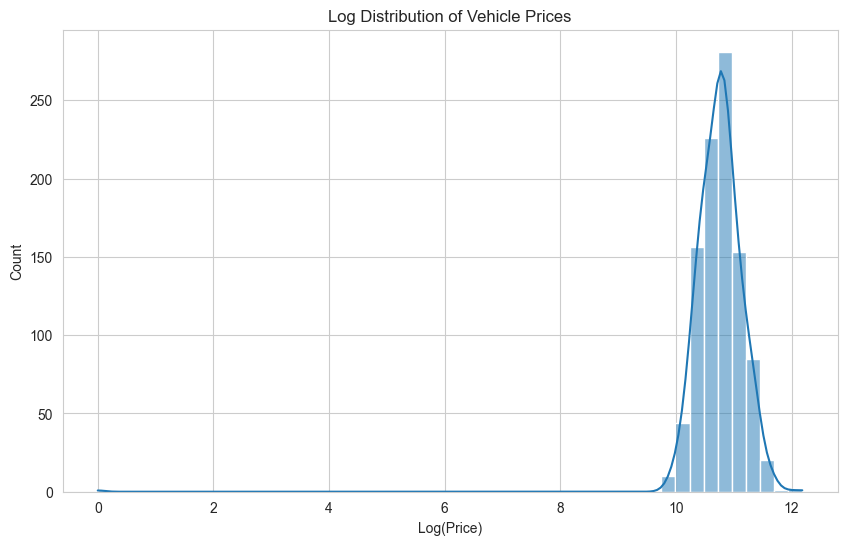

In [12]:
plt.figure(figsize=(10, 6))
sns.histplot(df['price'], kde=True, bins=50)
plt.title('Distribution of Vehicle Prices')
plt.xlabel('Price')
plt.ylabel('Frequency')
plt.show()

# It's common for price data to be skewed, so also check the log distribution
plt.figure(figsize=(10, 6))
sns.histplot(np.log1p(df['price']), kde=True, bins=50)
plt.title('Log Distribution of Vehicle Prices')
plt.xlabel('Log(Price)')
plt.show()

In [13]:
df.dropna(subset=['price'], inplace=True)

In [14]:
df.shape

(979, 15)

In [15]:
df.isnull().sum()

make                0
model               0
year                0
price               0
engine              2
cylinders         102
fuel                7
mileage            34
transmission        2
trim                1
body                3
doors               7
exterior_color      5
interior_color     37
drivetrain          0
dtype: int64

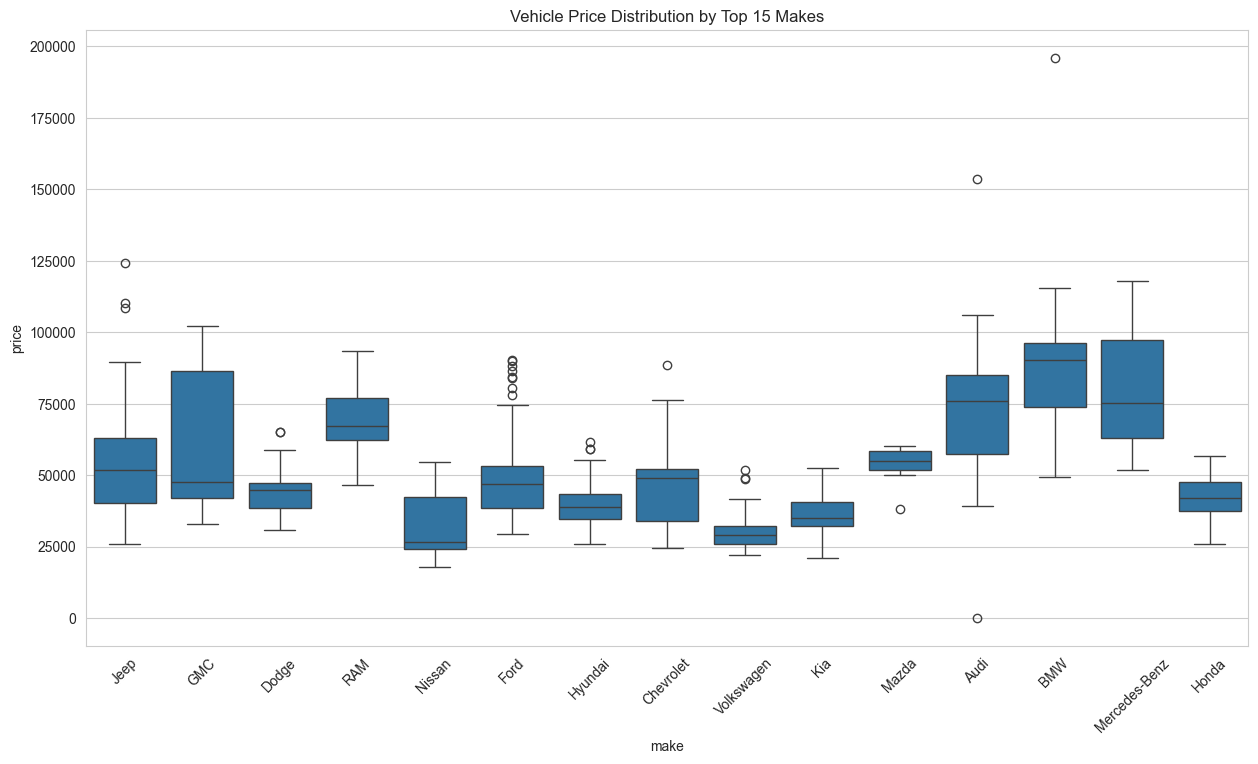

In [16]:
# To make the plot readable, let's focus on the top 15 manufacturers by count
top_makes = df['make'].value_counts().nlargest(15).index

plt.figure(figsize=(15, 8))
sns.boxplot(x='make', y='price', data=df[df['make'].isin(top_makes)])
plt.title('Vehicle Price Distribution by Top 15 Makes')
plt.xticks(rotation=45)
plt.show()

In [18]:
df.dtypes

make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

In [19]:
x=df.drop('price',axis=1)
y=df['price']

In [20]:
x.sample()

,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
658,Audi,A3,2024,16V GDI DOHC Turbo,4.0,Gasoline,76.0,7-Speed Automatic with Auto-Shift,Premium,Sedan,4.0,Florett Silver Metallic,Black,Front-wheel Drive


In [21]:
y

0       74600.0
1       50170.0
2       96410.0
3       46835.0
4       81663.0
         ...   
997     59037.0
998     49720.0
999     69085.0
1000    43495.0
1001    48995.0
Name: price, Length: 979, dtype: float64

In [22]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=1)

In [23]:
x_test.head()

,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
686,Jeep,Wagoneer,2024,24V GDI DOHC Twin Turbo,6.0,Gasoline,14.0,8-Speed Automatic,Base,SUV,4.0,Silver Zynith,Global Black,Four-wheel Drive
742,Hyundai,IONIQ 5,2024,c,NaN,Electric,10.0,1-Speed Automatic,Limited,SUV,4.0,Black,Gray,All-wheel Drive
955,GMC,Sierra 2500,2024,16V GDI OHV,8.0,Gasoline,3.0,10-Speed Automatic,Pro,Pickup Truck,2.0,Summit White,Jet Black,Rear-wheel Drive
6,Jeep,Wagoneer,2024,24V GDI DOHC Twin Turbo,6.0,Gasoline,5.0,8-Speed Automatic,Base,SUV,4.0,Bright White Clearcoat,Black,Rear-wheel Drive
977,Kia,Sportage,2024,16V PDI DOHC,4.0,Gasoline,10.0,8-Speed Automatic,SX-Prestige,SUV,4.0,Ebony Black,Black,Front-wheel Drive


In [24]:
x_train.head(3)

,make,model,year,engine,cylinders,fuel,mileage,transmission,trim,body,doors,exterior_color,interior_color,drivetrain
260,Jeep,Grand Cherokee L,2024,"ar 3.6L V-6 DOHC, variable valve control, regu...",6.0,Gasoline,6.0,Automatic,Altitude,SUV,4.0,Baltic Gray Metallic Clearcoat,Global Black,Four-wheel Drive
444,Ford,Edge,2024,16V GDI DOHC Turbo,4.0,Gasoline,5.0,8-Speed Automatic,SEL,SUV,4.0,Agate Black Metallic,Ebony,All-wheel Drive
824,Jeep,Compass,2024,16V GDI DOHC Turbo,4.0,Gasoline,14.0,8-Speed Automatic,Latitude,SUV,4.0,White,NaN,Four-wheel Drive


In [25]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((783, 14), (196, 14), (783,), (196,))

In [26]:
#handling the missing value
#data encoding
#feature scaling


from sklearn.impute import SimpleImputer #for missing value
from sklearn.preprocessing import OneHotEncoder #for encoding
from sklearn.preprocessing import StandardScaler #for scaling


from sklearn.pipeline import Pipeline #a sequence of data transformer
from sklearn.compose import ColumnTransformer #Groups all the pipeline steps for each of the columns

In [27]:
df.dtypes

make               object
model              object
year                int64
price             float64
engine             object
cylinders         float64
fuel               object
mileage           float64
transmission       object
trim               object
body               object
doors             float64
exterior_color     object
interior_color     object
drivetrain         object
dtype: object

In [28]:
cat_cols=["make","model","engine","fuel","transmission","trim","body","exterior_color","interior_color","drivetrain"]
num_cols=["year","cylinders","mileage","doors"]

In [29]:
#feature engineering automation using pipeline and columntransformer

num_pipeline = Pipeline(steps = [('imputation', SimpleImputer(strategy = "median")),
                                ('scaling', StandardScaler())])
cat_pipeline = Pipeline(steps=[
    ('imputation', SimpleImputer(strategy='most_frequent')),
    ('encoding', OneHotEncoder(handle_unknown='ignore'))
])


In [30]:
preprocessor = ColumnTransformer([("num_pipeline", num_pipeline, num_cols),
                  ("cat_pipeline", cat_pipeline, cat_cols)])

In [31]:
preprocessor

ColumnTransformer(transformers=[('num_pipeline',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='median')),
                                                 ('scaling',
                                                  StandardScaler())]),
                                 ['year', 'cylinders', 'mileage', 'doors']),
                                ('cat_pipeline',
                                 Pipeline(steps=[('imputation',
                                                  SimpleImputer(strategy='most_frequent')),
                                                 ('encoding',
                                                  OneHotEncoder(handle_unknown='ignore'))]),
                                 ['make', 'model', 'engine', 'fuel',
                                  'transmission', 'trim', 'body',
                                  'exterior_color', 'interior_color',
                                  'drivetrain'])])

In [32]:
# Make sure to use the original DataFrames for transformation
x_train = preprocessor.fit_transform(x_train)
x_test = preprocessor.transform(x_test)

In [33]:
x_train

<783x813 sparse matrix of type '<class 'numpy.float64'>'
	with 10962 stored elements in Compressed Sparse Row format>

In [34]:
#Now apply XG Boost
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

In [35]:
regressor=XGBRegressor()
regressor

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [36]:
regressor.fit(x_train,y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

In [37]:
y_pred = regressor.predict(x_test)

# Evaluate the model
print("Current model performance:")
print(f"R2 score: {r2_score(y_test, y_pred)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred)}")

Current model performance:
R2 score: 0.7742007218965086
Mean Absolute Error: 4743.007364078444
Mean Squared Error: 93643875.19855069


In [38]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1, 0.2]
}

In [39]:
grid_search = GridSearchCV(estimator=regressor, param_grid=param_grid, cv = 5, n_jobs = -1, verbose=3)

In [40]:
grid_search

GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [41]:
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None,
                                    learning_rate=None, max_bin=None,
                                    max_cat_threshold=None,
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.01, 0.05, 0.1, 0.2],
                         'n_estimators': [100, 200, 300]},
             verbose=3)

In [46]:
grid_search.best_params_

{'learning_rate': 0.1, 'n_estimators': 300}

In [50]:
best_model = grid_search.best_estimator_
y_pred_tuned = best_model.predict(x_test)

# Evaluate the tuned model
print("Tuned Vehicle_Price_Prediction model performance:")
print(f"R2 score: {r2_score(y_test, y_pred_tuned)}")
print(f"Mean Absolute Error: {mean_absolute_error(y_test, y_pred_tuned)}")
print(f"Mean Squared Error: {mean_squared_error(y_test, y_pred_tuned)}")

Tuned Vehicle_Price_Prediction model performance:
R2 score: 0.8014122117648634
Mean Absolute Error: 4559.254125478316
Mean Squared Error: 82358678.08631313


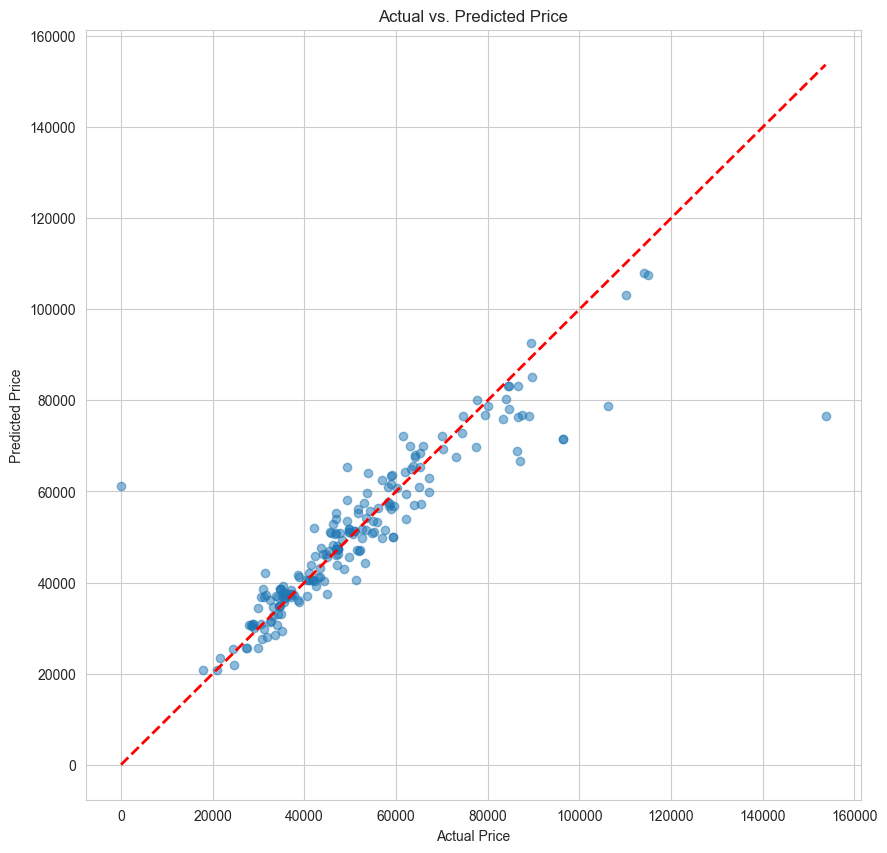

In [48]:
# Assuming 'y_test' are the true prices and 'y_pred_tuned' are your model's predictions
plt.figure(figsize=(10, 10))
plt.scatter(y_test, y_pred_tuned, alpha=0.5)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], '--r', linewidth=2)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted Price')
plt.show()